### Herbert Rafael Reyes Portillo
### Carnet: 23002116

# Proyecto 1

### Numero 1
Crear un entorno de anaconda con los paquetes que considere necesarios

In [88]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Numero 2
Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).

In [181]:
data = np.array(np.load('./Datos/proyecto_training_data.npy'))
dfbase= pd.DataFrame(data,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
entrenamiento=dfbase.iloc[0:1168]
base = dfbase.iloc[1168:1460]


### Numero 3

Analisis exploratorio de datos: Para cada variable en el dataset calcular:

- media
- valor maximo
- valor mnimo
- rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
- desviacion estandar.


In [63]:
media = entrenamiento.mean()
valor_max= entrenamiento.max()
valor_min= entrenamiento.min()
rango = valor_max - valor_min
desviacion_estandar= entrenamiento.std()


##### MEDIA

In [58]:
print(media)

SalePrice       180590.277397
OverallQual          6.101027
1stFlrSF          1156.323630
TotRmsAbvGrd         6.485445
YearBuilt         1971.451199
LotFrontage         69.946985
dtype: float64


##### VALOR MAXIMO

In [59]:
print(valor_max)

SalePrice       755000.0
OverallQual         10.0
1stFlrSF          3228.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64


##### VALOR MINIMO


In [60]:
print(valor_min)

SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64


##### RANGO PTP

In [61]:
print(rango)

SalePrice       720100.0
OverallQual          9.0
1stFlrSF          2894.0
TotRmsAbvGrd        12.0
YearBuilt          135.0
LotFrontage        292.0
dtype: float64


##### DESVIACION ESTANDAR

In [62]:
print(desviacion_estandar)

SalePrice       78815.697902
OverallQual         1.378025
1stFlrSF          373.780374
TotRmsAbvGrd        1.609141
YearBuilt          29.951707
LotFrontage        23.478161
dtype: float64


#### Numero 4
Para cada variable en el dataset usar seaborn(funcion distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

- Nota: Se utilizo histplot, ya que segun la documentacion distplot ha dejado de utilizarse


Variable SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

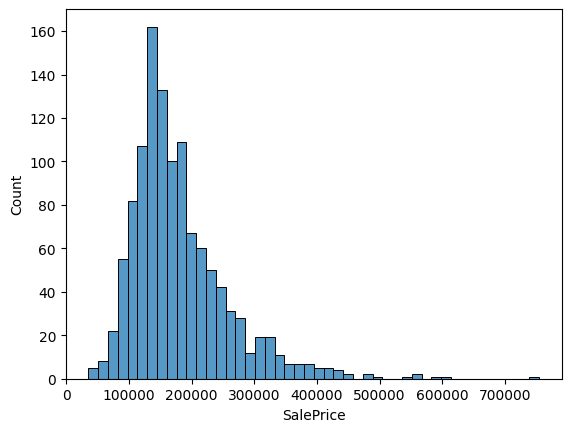

In [81]:
sb.histplot(data=entrenamiento, x="SalePrice")

Variable OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

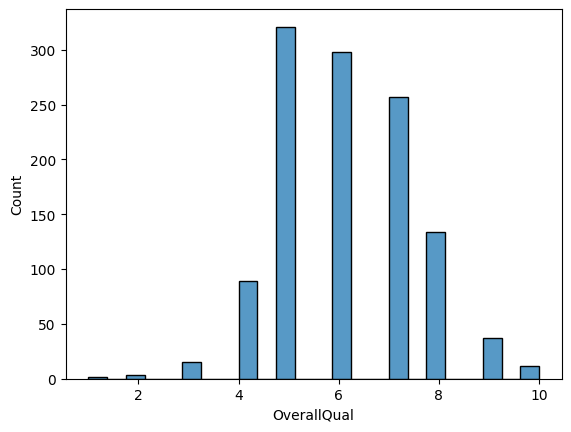

In [82]:
sb.histplot(data=entrenamiento, x="OverallQual")

Variable 1stFlrSF

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

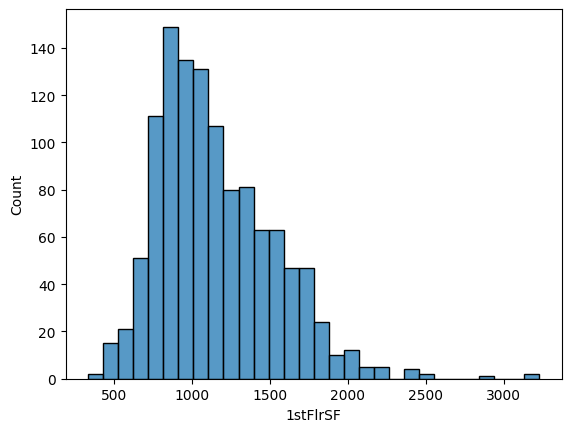

In [83]:
sb.histplot(data=entrenamiento, x="1stFlrSF")

Variable TotRmsAbvGrd

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

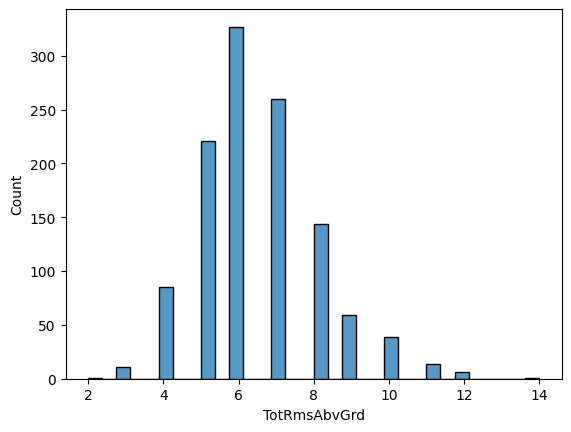

In [84]:
sb.histplot(data=entrenamiento, x="TotRmsAbvGrd")

Variable YearBuilt

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

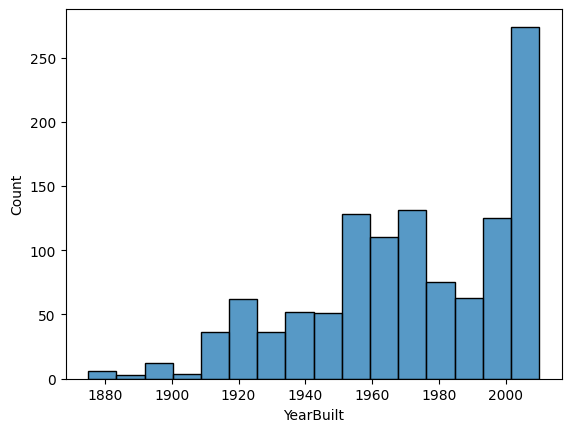

In [85]:
sb.histplot(data=entrenamiento, x="YearBuilt")

Variable LotFrontage

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

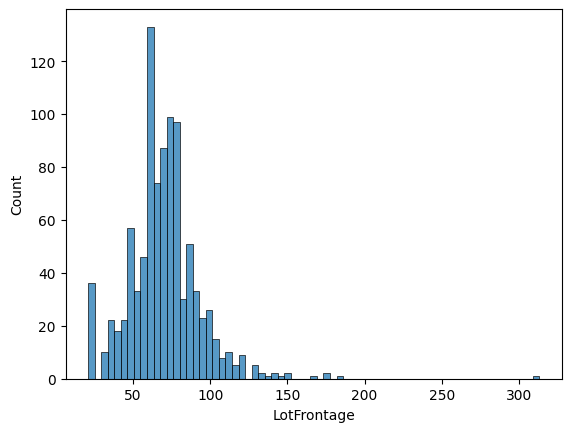

In [86]:
sb.histplot(data=entrenamiento, x="LotFrontage")

#### Numero 5
Para cada variable independiente x :

- Calcular el coeficiente de correlacion entre x y y.

In [230]:
entrenamiento.corr()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
OverallQual,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
1stFlrSF,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
TotRmsAbvGrd,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
YearBuilt,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
LotFrontage,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica

c:\Users\herbe\anaconda3\envs\maestria\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


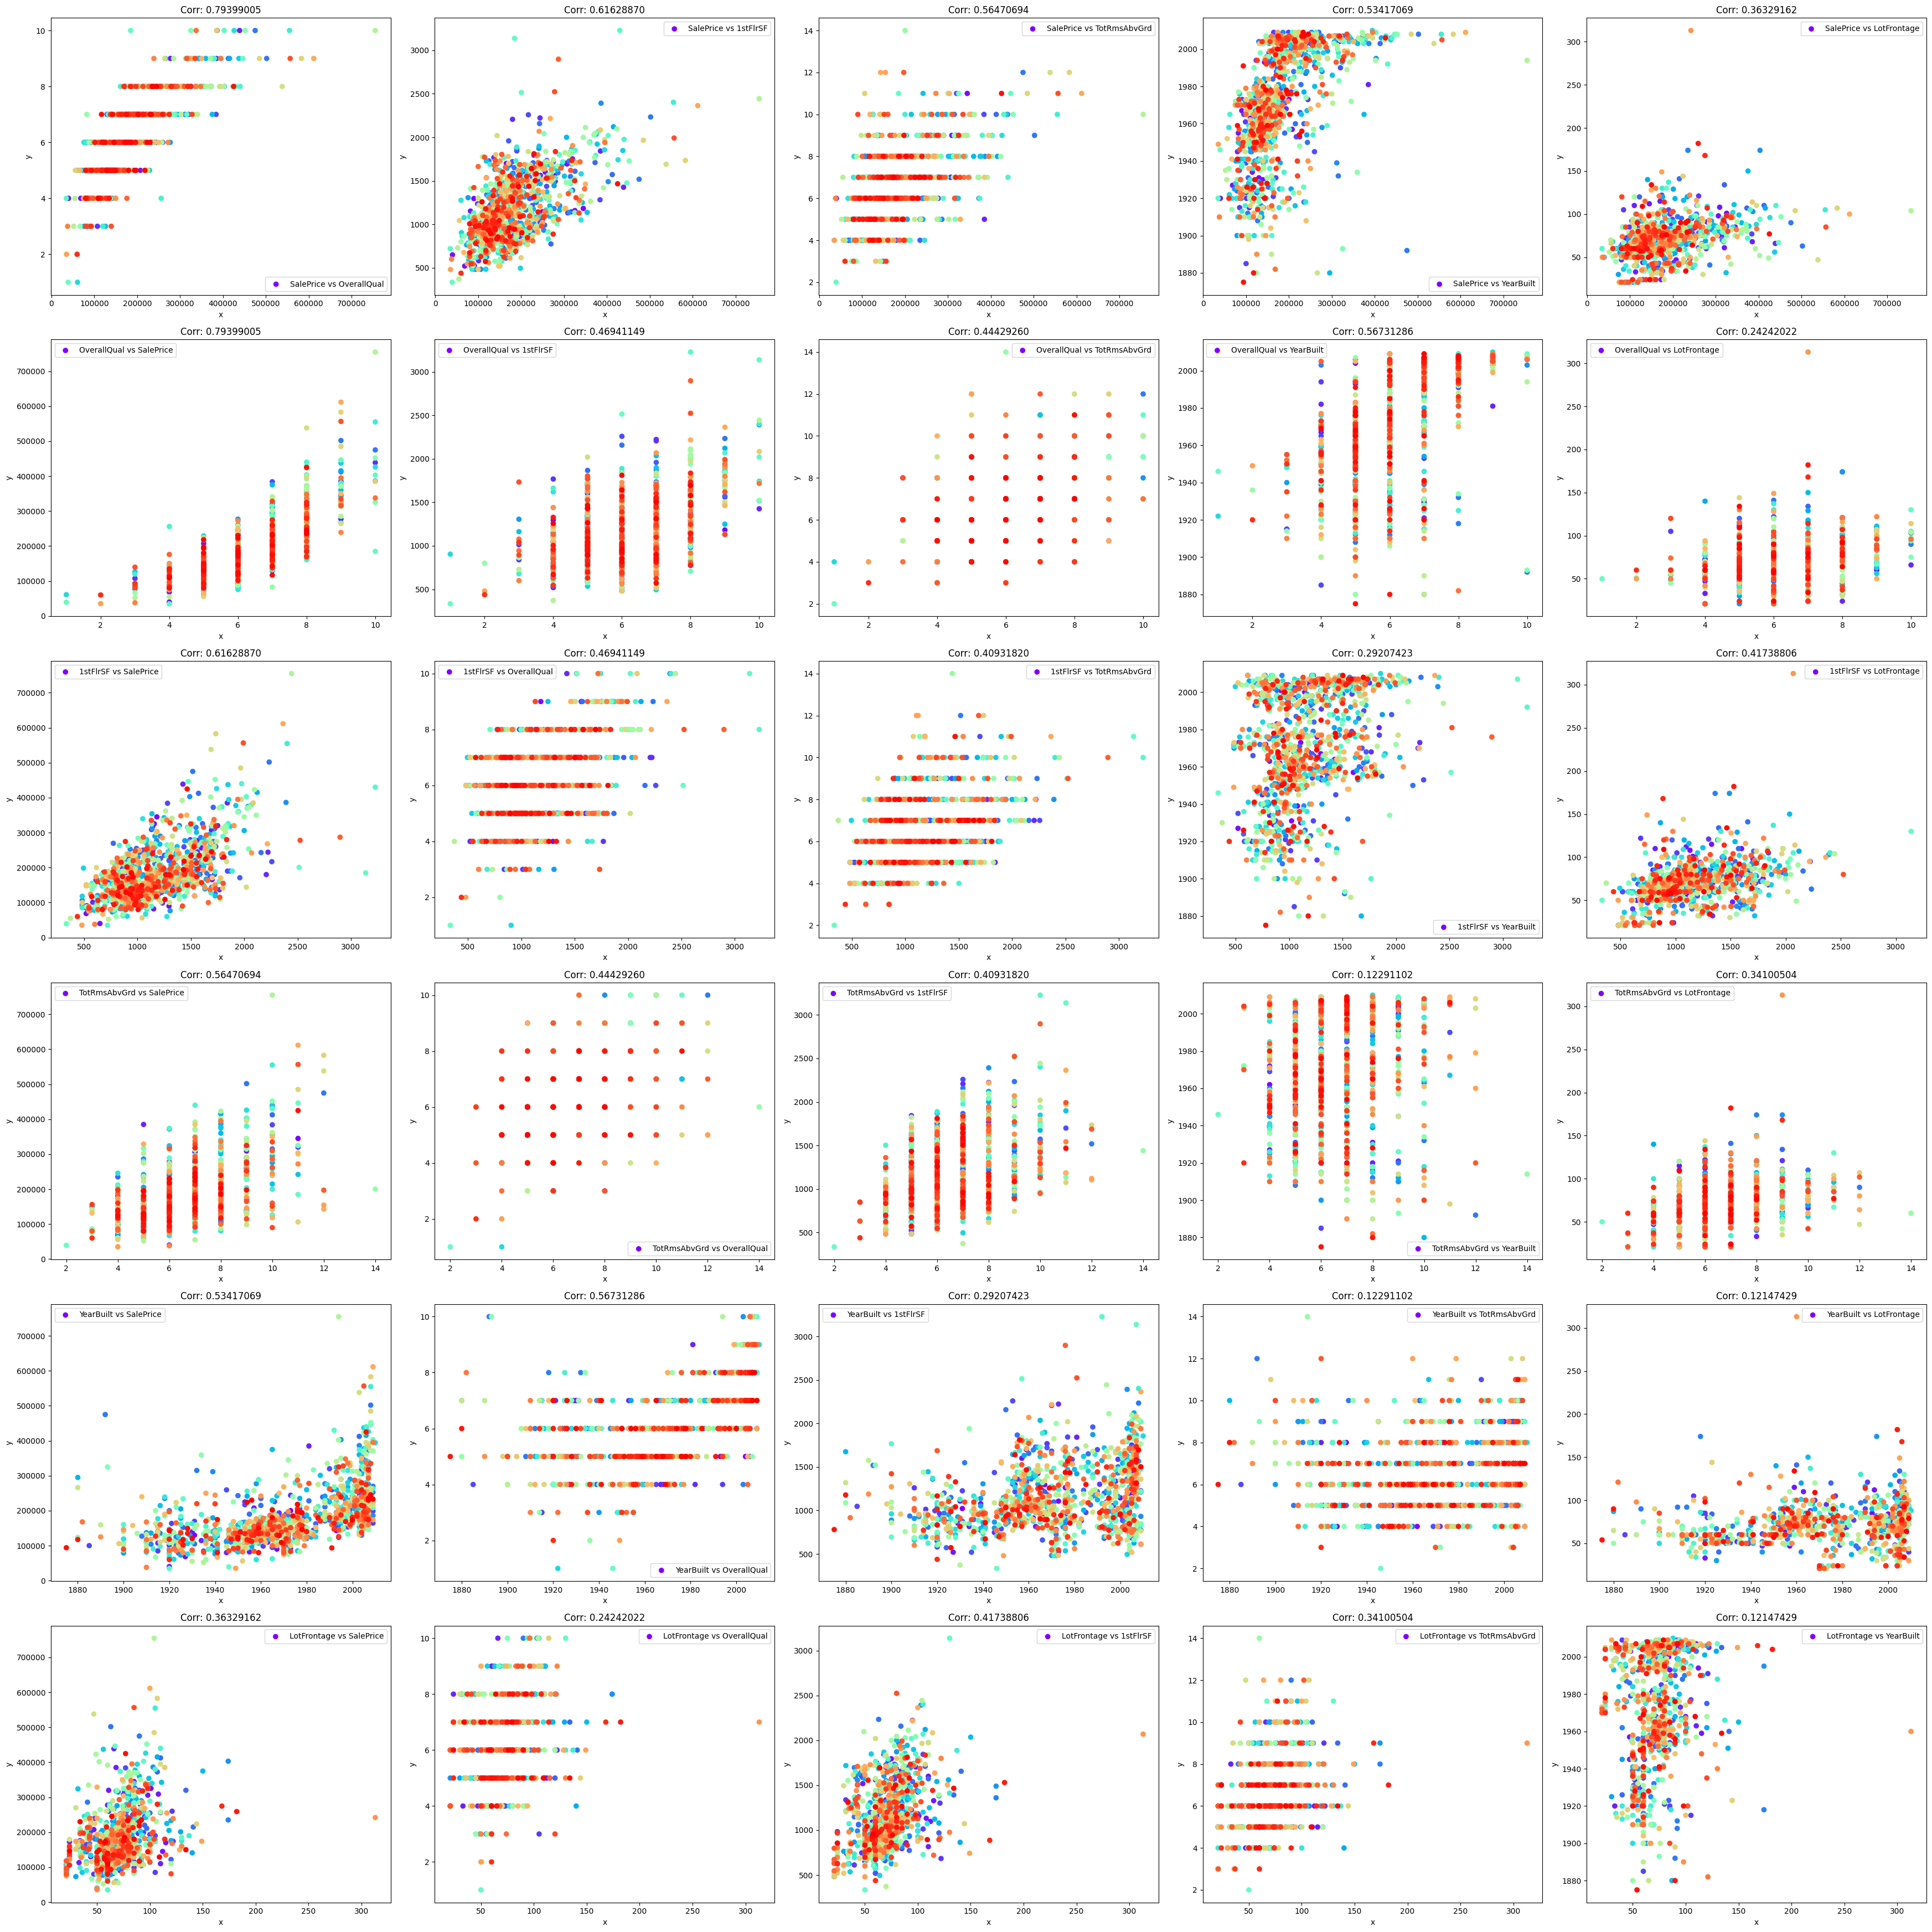

In [127]:
fig, plot = plt.subplots(nrows=6, ncols=5, figsize=(35, 35))
i=0
for x_col_name, x_col_data in entrenamiento.iteritems():
    j=0
    for y_col_name, y_col_data in entrenamiento.iteritems():
        if x_col_name == y_col_name:
            continue  # saltar si x e y son la misma columna
        corr_coef = entrenamiento[x_col_name].corr(entrenamiento[y_col_name])
        plot[i,j].scatter(x_col_data, y_col_data, label=f'{x_col_name} vs {y_col_name}',c=np.arange(len(entrenamiento[x_col_name])),cmap='rainbow')
        plot[i,j].set_xlabel('x')
        plot[i,j].set_ylabel('y')
        plot[i,j].legend()
        plot[i, j].set_title(f'Corr: {corr_coef:.8f}')
        j=j+1
    i = i+1

fig.tight_layout()

fig.show()

Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables
con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion entre dicha variable y la variable dependiente.

Respuesta: En base a los analisis, se puede determinar que las variables que presentan la mayor correlacion son:
- Variable X OverallQual y Variable Y SalePrice
- Variable X 1stFlrSF y Variable Y SalePrice

#### Numero 6

Crear una funcion para entrenar un modelo de regresi´on lineal de una variable y = β0 +β1 ∗x.
La funcion recibe como argumentos:
- 6.1 Vector con la variable independiente x,
- 6.2 Vector con la variable dependiente y,
- 6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
- 6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos imprimir a traves de print: el numero de iteracion, el error del modelo en esa iteracion, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.
- 6.5 escalar α(learning rate): es usado como parte de la expresion matematica para actualizar en cada iteracion los parametros del modelo.

Epoch hasta 10, Error es: 1394455373.4370556
Epoch hasta 20, Error es: 1390348643.7985687
Epoch hasta 30, Error es: 1388053743.4133937
Epoch hasta 40, Error es: 1385780540.3295023
Epoch hasta 50, Error es: 1383528766.729979
Epoch hasta 60, Error es: 1381298220.5968475
Epoch hasta 70, Error es: 1379088701.8188133
Epoch hasta 80, Error es: 1376900012.1710312
Epoch hasta 90, Error es: 1374731955.2973218
Epoch hasta 100, Error es: 1372584336.6925538


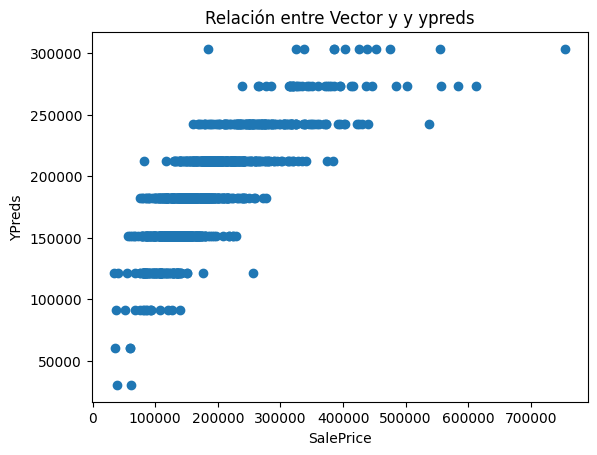

[[1.         0.79399005]
 [0.79399005 1.        ]]


In [268]:
def regresion_lineal(VectorX,VectorY,epochs,imprimir_error_cada,alpha):
    unos = np.ones(len(VectorX))
    matriz= np.column_stack((unos,VectorX))
    beta0 = np.random.rand()
    beta1 = np.random.rand()
    n=len(VectorY)
    beta = np.array([beta0, beta1])
    modelo={}
    errores = np.zeros(epochs)
    ypreds = np.zeros(epochs)
    for i in range(epochs):
        
        y_pred = np.dot(matriz,beta)
        error = (1/(2*n)) * np.sum((VectorY - y_pred)**2)
        
        
        errores[i]=error
        if (i+1) % imprimir_error_cada == 0:
            print(f"Epoch hasta {i+1}, Error es: {error}")
        
        modelo[i]= beta.copy()
        
        grad_beta0 = (1/n)* np.sum(y_pred-VectorY)
        grad_beta1 = (1/n)* np.sum((y_pred-VectorY)*VectorX)
        beta[0]= beta[0] - (alpha* grad_beta0)
        beta[1]= beta[1] - (alpha * grad_beta1)
        ypreds=y_pred

    return modelo,errores,ypreds

modelo,errores,ypreds=regresion_lineal(entrenamiento['OverallQual'],entrenamiento['SalePrice'],100,10,0.01)


plt.plot(entrenamiento['SalePrice'], ypreds, 'o')
plt.xlabel('SalePrice')
plt.ylabel('YPreds')
plt.title('Relación entre Vector y y ypreds')
plt.show()

print(np.corrcoef(entrenamiento['SalePrice'],ypreds))

Crear una funcion que nos permita visualizar con matplotlib como cambia el error en
el tiempo: crear una funcion que tome como parametro el vector de errores generados
por la funcion de entrenamiento y grafique en el eje x el numero de iteracion y en
el eje y el error para esa iteracion

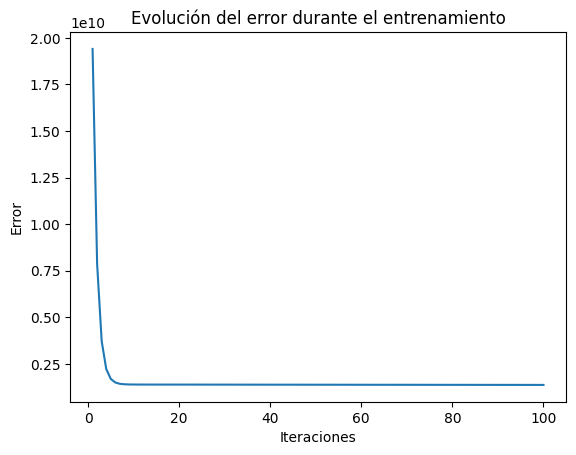

In [260]:
def plot_evolucion_errores(errores):
    plt.plot(range(1,len(errores)+1),errores)
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title('Evolución del error durante el entrenamiento')
    plt.show()

plot_evolucion_errores(errores)
